In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from enum import Enum
warnings.filterwarnings("ignore")

In [29]:
song_data = pd.read_csv('datasets/Spotify_Dataset_V3.csv', delimiter=';')
song_data.info()
song_data.describe()
spotify_song_data = song_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

In [30]:
spotify_song_data['Date'] = pd.to_datetime(spotify_song_data['Date'], format='%d/%m/%Y')

spotify_song_data['Data_Month'] = spotify_song_data['Date'].dt.to_period('M')

spotify_song_data.head()

average_monthly_points = spotify_song_data.groupby(['id', 'Data_Month'])['Points (Total)'].mean().reset_index()

average_monthly_points.rename(columns={'Points (Total)': 'Average_Points'}, inplace=True)

monthly_data = pd.merge(spotify_song_data, average_monthly_points, on=['id', 'Data_Month'], how='left')

columns_to_drop = ['Points (Total)', 'Points (Ind for each Artist/Nat)', 'Date', 'Rank']
monthly_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

monthly_data.drop_duplicates(inplace=True)

monthly_data.head(500)

,Title,Artists,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,id,Song URL,Data_Month,Average_Points
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023-05,199.586207
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023-05,199.586207
2,WHERE SHE GOES,Bad Bunny,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,2023-05,198.909091
3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023-05,197.724138
4,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023-05,197.724138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8451,Ch y la Pizza,"Fuerza Regida, Natanael Cano",0.628,0.668,-2722.0,0.117,0.329,0.000,0.845,Artist 1,Fuerza Regida,Nationality 1,Mexico,Latin-America,0UbesRsX2TtiCeamOIVEkp,https://open.spotify.com/track/0UbesRsX2TtiCea...,2023-04,143.233333
8452,Ch y la Pizza,"Fuerza Regida, Natanael Cano",0.628,0.668,-2722.0,0.117,0.329,0.000,0.845,Artist 2,Natanael Cano,Nationality 2,Mexico,Latin-America,0UbesRsX2TtiCeamOIVEkp,https://open.spotify.com/track/0UbesRsX2TtiCea...,2023-04,143.233333
8453,Chanel,"Becky G, Peso Pluma",0.852,0.675,-5738.0,0.036,0.397,0.003,0.528,Artist 1,Becky G,Nationality 1,United States,Anglo-America,5RcxRGvmYai7kpFSfxe5GY,https://open.spotify.com/track/5RcxRGvmYai7kpF...,2023-04,117.583333
8454,Chanel,"Becky G, Peso Pluma",0.852,0.675,-5738.0,0.036,0.397,0.003,0.528,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,5RcxRGvmYai7kpFSfxe5GY,https://open.spotify.com/track/5RcxRGvmYai7kpF...,2023-04,117.583333


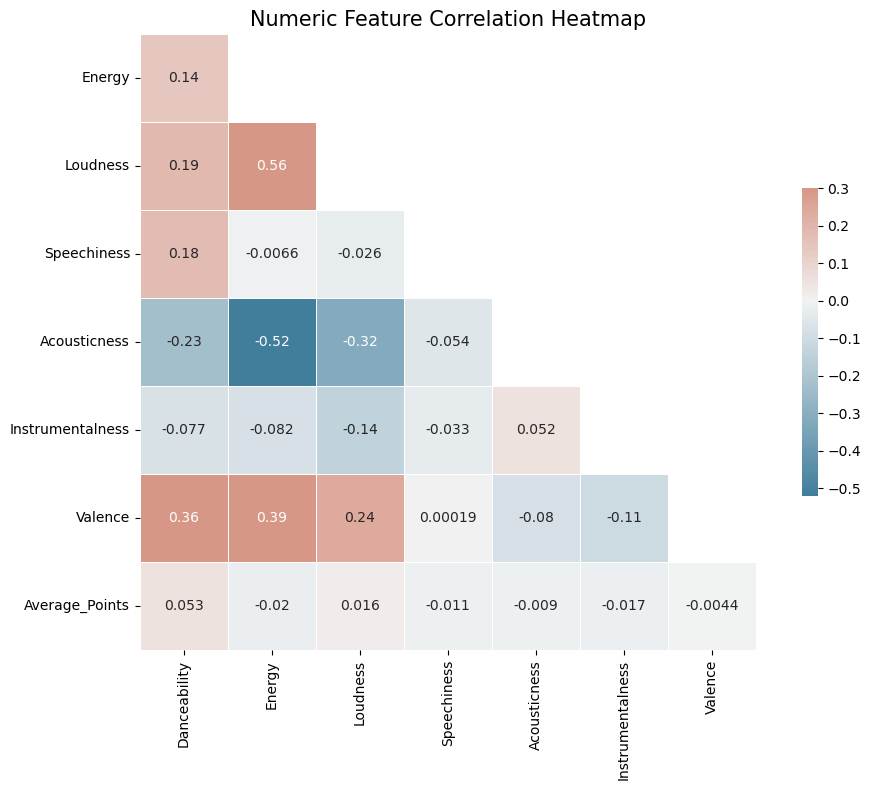

In [31]:
# Compute the correlation matrix
corr_matrix = monthly_data.corr()

corr_matrix = corr_matrix.iloc[1:, :-1]

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k = 1)

plt.figure(figsize=(12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Numeric Feature Correlation Heatmap", fontsize=15)
plt.show()

In [41]:
# Extracting year from the 'Data_Month' column
monthly_data['Year'] = monthly_data['Data_Month'].dt.year

yearly_avg_points = monthly_data.groupby(['Artist (Ind.)', 'Year'])['Average_Points'].mean().reset_index()

yearly_avg_points_pivot = yearly_avg_points.pivot_table(index='Artist (Ind.)', columns='Year', values='Average_Points').reset_index()

for year in range(2017, 2023):
    yearly_avg_points_pivot[f'Growth_{year+1}'] = ((yearly_avg_points_pivot[year+1] - yearly_avg_points_pivot[year]) / yearly_avg_points_pivot[year]) * 100

yearly_avg_points_pivot.fillna(0, inplace=True)  
yearly_avg_points_pivot.head()

Year,Artist (Ind.),2017,2018,2019,2020,2021,2022,2023,Growth_2018,Growth_2019,Growth_2020,Growth_2021,Growth_2022,Growth_2023
0,$NOT,0.000000,0.000000,0.0,0.000000,57.132873,85.166667,0.000000,0.000000,0.000000,0.000000,0.0,49.067713,0.000000
1,$uicideboy$,0.000000,0.000000,0.0,0.000000,52.913492,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,(G)I-DLE,0.000000,76.217391,0.0,79.547368,0.000000,46.750140,83.142857,0.000000,0.000000,0.000000,0.0,0.000000,77.845151
3,*NSYNC,85.333333,59.666667,76.5,83.333333,101.333333,71.875000,0.000000,-30.078125,28.212291,8.932462,21.6,-29.070724,0.000000
4,070 Shake,0.000000,113.000000,0.0,0.000000,0.000000,90.538146,146.873498,0.000000,0.000000,0.000000,0.0,0.000000,62.222780


In [42]:
from sklearn.preprocessing import LabelEncoder

#Initializing the label encoder
label_encoder = LabelEncoder()

#Encoding the 'Artist (Ind.)' column
yearly_avg_points_pivot['Artist_Encoded'] = label_encoder.fit_transform(yearly_avg_points_pivot['Artist (Ind.)'])

yearly_avg_points_pivot[['Artist (Ind.)', 'Artist_Encoded']].head()

Year,Artist (Ind.),Artist_Encoded
0,$NOT,0
1,$uicideboy$,1
2,(G)I-DLE,2
3,*NSYNC,3
4,070 Shake,4


In [43]:
threshold_75th_percentile = yearly_avg_points_pivot[2023].quantile(0.75)
yearly_avg_points_pivot['Popular'] = (yearly_avg_points_pivot[2023] > threshold_75th_percentile).astype(int)
yearly_avg_points_pivot[['Artist (Ind.)', 2023, 'Popular']].head()
threshold_75th_percentile_2021 = yearly_avg_points_pivot[2021].quantile(0.75)
threshold_75th_percentile_2022 = yearly_avg_points_pivot[2022].quantile(0.75)
yearly_avg_points_pivot['Popular_2021'] = (yearly_avg_points_pivot[2021] > threshold_75th_percentile_2021).astype(int)
yearly_avg_points_pivot['Popular_2022'] = (yearly_avg_points_pivot[2022] > threshold_75th_percentile_2022).astype(int)

yearly_avg_points_pivot[['Artist (Ind.)', 2021, 'Popular_2021', 2022, 'Popular_2022']].head()

Year,Artist (Ind.),2021,Popular_2021,2022,Popular_2022
0,$NOT,57.132873,1,85.166667,1
1,$uicideboy$,52.913492,1,0.000000,0
2,(G)I-DLE,0.000000,0,46.750140,0
3,*NSYNC,101.333333,1,71.875000,1
4,070 Shake,0.000000,0,90.538146,1


In [44]:
data_2022 = monthly_data[monthly_data['Year'] == 2022]
monthly_avg_points_2022 = data_2022.groupby(['Artist (Ind.)', 'Data_Month'])['Average_Points'].mean().reset_index()
monthly_avg_points_2022.sort_values(by=['Artist (Ind.)', 'Data_Month'], inplace=True)

monthly_avg_points_2022['Monthly_Growth_Rate'] = monthly_avg_points_2022.groupby('Artist (Ind.)')['Average_Points'].pct_change().fillna(0) * 100

avg_monthly_growth_rate_2022 = monthly_avg_points_2022.groupby('Artist (Ind.)')['Monthly_Growth_Rate'].mean().reset_index()

avg_monthly_growth_rate_2022.head()

,Artist (Ind.),Monthly_Growth_Rate
0,$NOT,0.000000
1,(G)I-DLE,42.885207
2,*NSYNC,0.000000
3,070 Shake,-11.140806
4,21 Savage,21.835123


In [45]:
merged_data = avg_monthly_growth_rate_2022.merge(yearly_avg_points_pivot[['Artist (Ind.)', 'Popular']], on='Artist (Ind.)', how='left')

merged_data['Popular'].fillna(0, inplace=True)

X = merged_data[['Monthly_Growth_Rate']]
y = merged_data['Popular']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((624, 1), (268, 1))

In [46]:
# Calculating the total average points for each artist in 2022
total_avg_points_2022 = data_2022.groupby('Artist (Ind.)')['Average_Points'].mean().reset_index()
total_avg_points_2022.rename(columns={'Average_Points': 'Total_Avg_Points_2022'}, inplace=True)

merged_data = merged_data.merge(total_avg_points_2022, on='Artist (Ind.)', how='left')

merged_data['Total_Avg_Points_2022'].fillna(0, inplace=True)

merged_data.head()

,Artist (Ind.),Monthly_Growth_Rate,Popular,Total_Avg_Points_2022
0,$NOT,0.000000,0,85.166667
1,(G)I-DLE,42.885207,1,46.750140
2,*NSYNC,0.000000,0,71.875000
3,070 Shake,-11.140806,1,90.538146
4,21 Savage,21.835123,1,116.424682


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.6753731343283582,
 array([[171,   2],
        [ 85,  10]]),
 '              precision    recall  f1-score   support\n\n           0       0.67      0.99      0.80       173\n           1       0.83      0.11      0.19        95\n\n    accuracy                           0.68       268\n   macro avg       0.75      0.55      0.49       268\nweighted avg       0.73      0.68      0.58       268\n')

In [49]:
data_2022 = monthly_data[monthly_data['Year'] == 2022]

monthly_avg_points_2022 = data_2022.groupby(['Artist (Ind.)', 'Data_Month'])['Average_Points'].mean().reset_index()

monthly_avg_points_2022.sort_values(by=['Artist (Ind.)', 'Data_Month'], inplace=True)

monthly_avg_points_2022['Monthly_Growth_Rate'] = monthly_avg_points_2022.groupby('Artist (Ind.)')['Average_Points'].pct_change().fillna(0) * 100

avg_monthly_growth_rate_2022 = monthly_avg_points_2022.groupby('Artist (Ind.)')['Monthly_Growth_Rate'].mean().reset_index()

avg_monthly_growth_rate_2022.head()

,Artist (Ind.),Monthly_Growth_Rate
0,$NOT,0.000000
1,(G)I-DLE,42.885207
2,*NSYNC,0.000000
3,070 Shake,-11.140806
4,21 Savage,21.835123


In [50]:
X_new = merged_data[['Total_Avg_Points_2022']]
y_new = merged_data['Popular']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

log_reg_new = LogisticRegression(random_state=42)
log_reg_new.fit(X_train_new, y_train_new)

y_pred_new = log_reg_new.predict(X_test_new)

accuracy_new = accuracy_score(y_test_new, y_pred_new)
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
class_report_new = classification_report(y_test_new, y_pred_new)

accuracy_new, conf_matrix_new, class_report_new

(0.6567164179104478,
 array([[172,   1],
        [ 91,   4]]),
 '              precision    recall  f1-score   support\n\n           0       0.65      0.99      0.79       173\n           1       0.80      0.04      0.08        95\n\n    accuracy                           0.66       268\n   macro avg       0.73      0.52      0.43       268\nweighted avg       0.71      0.66      0.54       268\n')

In [51]:
artists_2022 = set(data_2022['Artist (Ind.)'].unique())
artists_2023 = set(monthly_data[monthly_data['Year'] == 2023]['Artist (Ind.)'].unique())

In [52]:
artists_only_in_2022 = artists_2022 - artists_2023

num_artists_only_in_2022 = len(artists_only_in_2022)
num_artists_only_in_2022





In [54]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
artists_both_years = artists_2022.intersection(artists_2023)
data_both_years = monthly_data[monthly_data['Artist (Ind.)'].isin(artists_both_years)]

yearly_avg_points_both_years = data_both_years.groupby(['Artist (Ind.)', 'Year'])['Average_Points'].mean().reset_index()

encoder = LabelEncoder()
yearly_avg_points_both_years['Artist_Code'] = encoder.fit_transform(yearly_avg_points_both_years['Artist (Ind.)'])

threshold_2022_both_years = yearly_avg_points_both_years[yearly_avg_points_both_years['Year'] == 2022]['Average_Points'].quantile(0.75)
yearly_avg_points_both_years['Popular'] = np.where((yearly_avg_points_both_years['Year'] == 2022) & 
                                                  (yearly_avg_points_both_years['Average_Points'] > threshold_2022_both_years), 1, 0)
data_for_model_both_years = yearly_avg_points_both_years.merge(avg_monthly_growth_rate_2022, on='Artist (Ind.)', how='inner')
data_for_model_both_years = data_for_model_both_years.merge(total_avg_points_2022, on='Artist (Ind.)', how='inner')
data_train_both_years = data_for_model_both_years[data_for_model_both_years['Year'] == 2022]
X_final_both_years = data_train_both_years[['Artist_Code', 'Monthly_Growth_Rate', 'Total_Avg_Points_2022']]
y_final_both_years = data_train_both_years['Popular']

X_train_final_both, X_test_final_both, y_train_final_both, y_test_final_both = train_test_split(
    X_final_both_years, y_final_both_years, test_size=0.3, random_state=42, stratify=y_final_both_years)

log_reg_final_both = LogisticRegression(random_state=42, max_iter=1000)
log_reg_final_both.fit(X_train_final_both, y_train_final_both)

y_pred_final_both = log_reg_final_both.predict(X_test_final_both)
accuracy_final_both = accuracy_score(y_test_final_both, y_pred_final_both)
conf_matrix_final_both = confusion_matrix(y_test_final_both, y_pred_final_both)
class_report_final_both = classification_report(y_test_final_both, y_pred_final_both)

accuracy_final_both, conf_matrix_final_both, class_report_final_both

(0.9895833333333334,
 array([[72,  0],
        [ 1, 23]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99        72\n           1       1.00      0.96      0.98        24\n\n    accuracy                           0.99        96\n   macro avg       0.99      0.98      0.99        96\nweighted avg       0.99      0.99      0.99        96\n')